<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

### Dataset

In [3]:
# Load the dataset
noise = pd.read_csv(
    "data/airfoil_self_noise.dat",
    delimiter="\t",
    names=[
        "frequency",
        "angle",
        "chord_length",
        "free_stream_velocity",
        "displacement_thickness",
        "self_noise",
    ],
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This is a NASA dataset obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel.

It appears to have 6 different features and 1503 rows. Additionally the data does not contain any missing values and the 'y' value that we are trying to predict is scaled sound pressure level, in decibels.


- Find out how many rows and columns are in `noise`.

In [4]:
print(noise.shape)

noise.head()

(1503, 6)


,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


- Find out what data types are present.

In [5]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [6]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [7]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

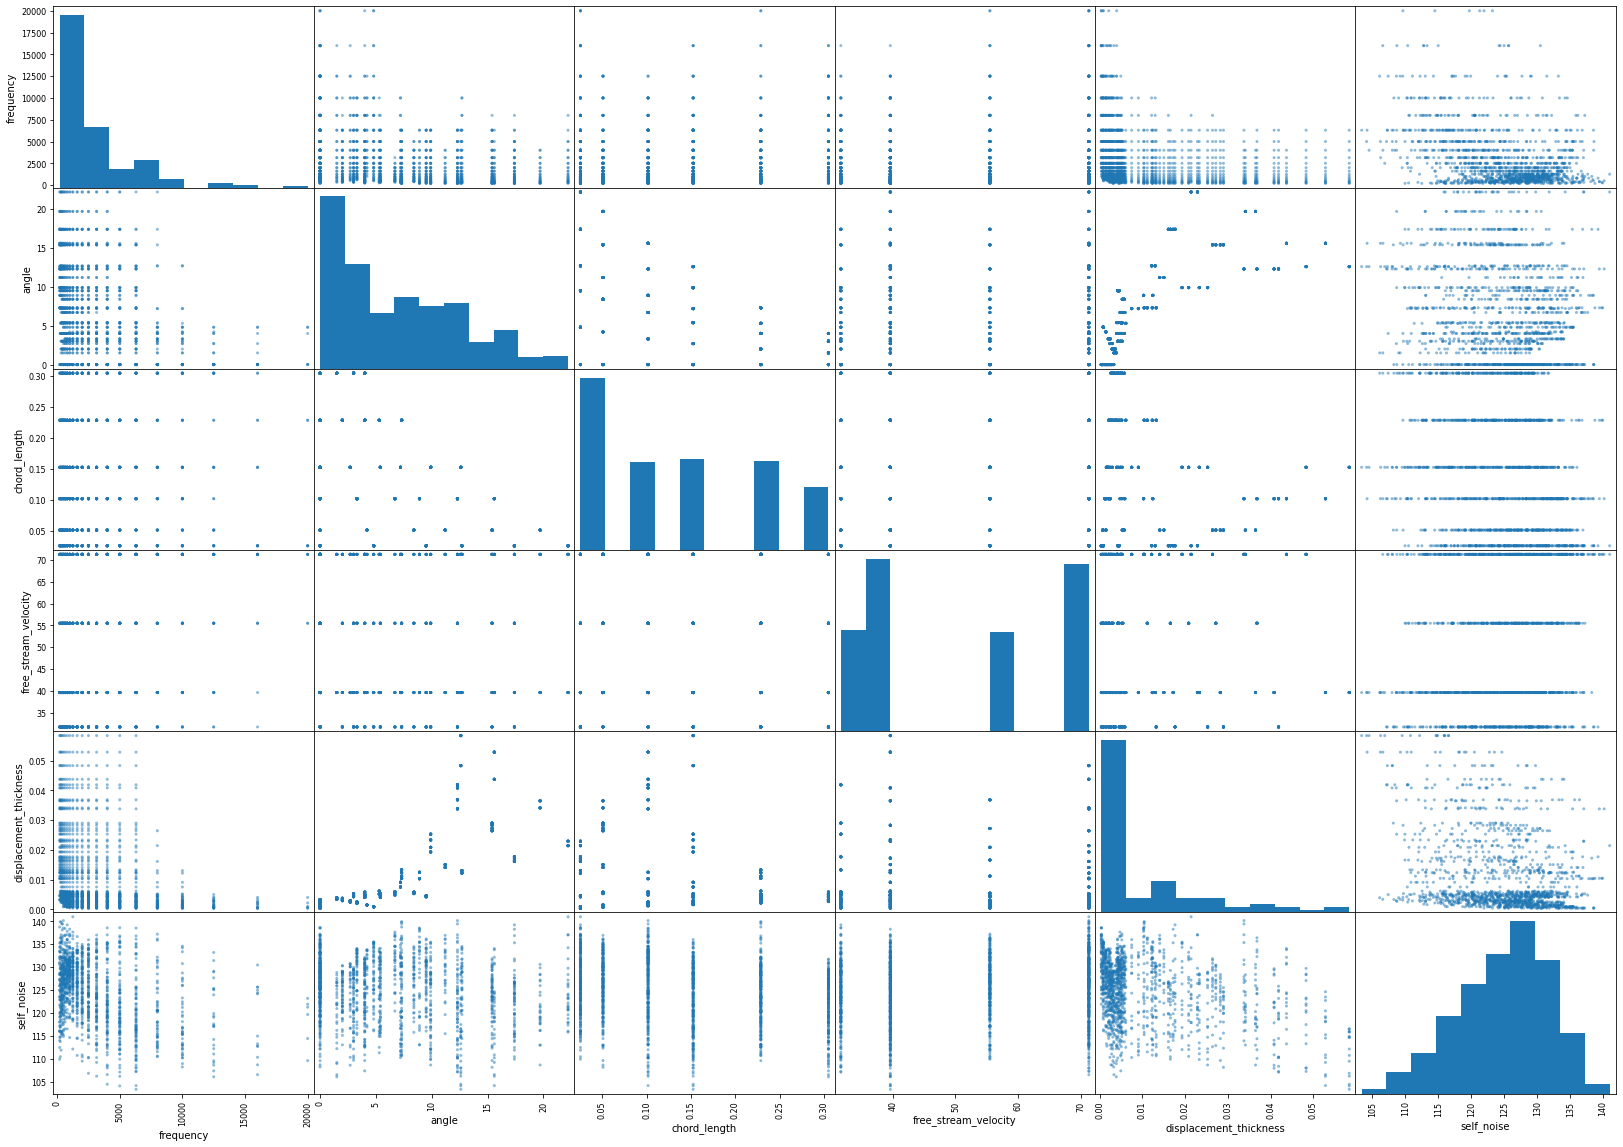

In [8]:
axs = pd.plotting.scatter_matrix(noise[['frequency', 'angle', 'chord_length', 'free_stream_velocity', 'displacement_thickness', 'self_noise']], figsize= (28, 20))


- Which variables are approximately normally distributed?

Looks like chord_length, self_noise and free_stream_velocity are fairly normally distributed.

- Which variables show strong skew?

Frequency, angle and displacement thickness shows strong skew.

- Make a scatterplot of each feature variable with the target variable "self_noise".

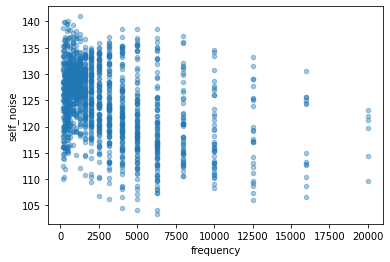

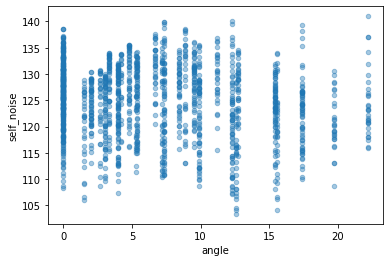

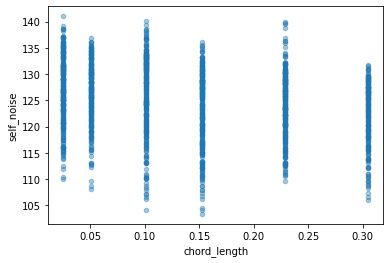

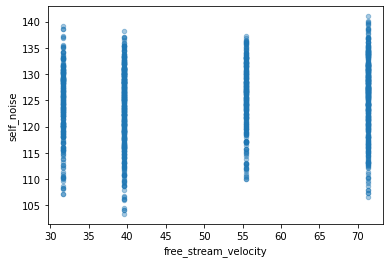

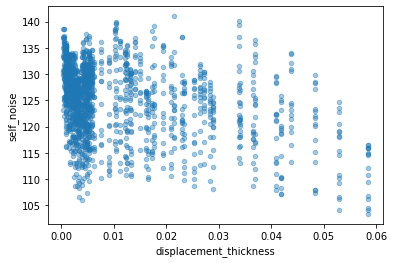

In [9]:
ax = noise.plot.scatter(x='frequency', y='self_noise', alpha=0.4)
ax = noise.plot.scatter(x='angle', y='self_noise', alpha=0.4)
ax = noise.plot.scatter(x='chord_length', y='self_noise', alpha=0.4)
ax = noise.plot.scatter(x='free_stream_velocity', y='self_noise', alpha=0.4)
ax = noise.plot.scatter(x='displacement_thickness', y='self_noise', alpha=0.4)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

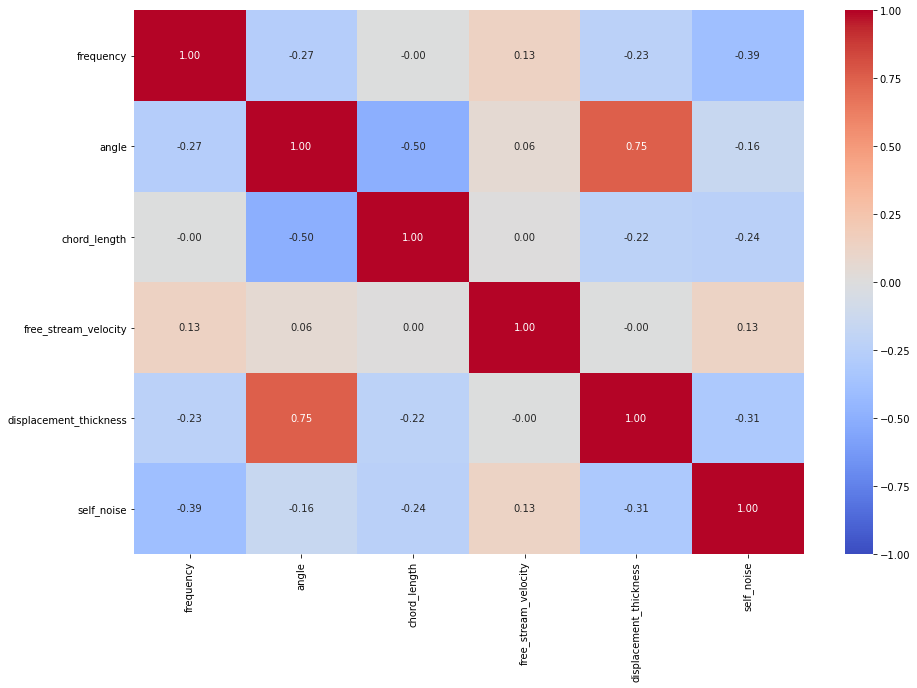

In [10]:
import seaborn as sns
ax = plt.figure(figsize=(15,10))
sns.heatmap(
    noise.corr(),
    cmap='coolwarm',
    center=0,
    vmin= -1,
    vmax= 1,
    annot= True,
    fmt='.2f'
);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

The data seems to have a wave pattern with repeats of ups and downs as seen in free_stream_velocity and chord_length. The lack of linearity suggests that mayhaps a decision tree/random forest model could be a useful model. 

### Linear Regression

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [11]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Defining X and y variables
X = noise[['frequency', 'angle', 'chord_length', 'free_stream_velocity', 'displacement_thickness']]
y = noise.self_noise

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


# Importing Linear Regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Test score:', lr.score(X_test, y_test))
print('Train score:', lr.score(X_train, y_train))

Test score: 0.4982726587932874
Train score: 0.5214416938715565


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My model has a train score of 0.52, so 52% better on training compared to the null model. Compared to the 0.50 test score, it seems this model has a higher bias. 


- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Since my model's test score is 0.50 and not too far of a difference from the train score of 0.52, I'd say it doesn't have a high variance. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

I'd say more of a bias problem because the train score is slightly higher than the test score but lower vs. the null model.


### Random Forest

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestRegressor` and then use `RandomForestRegressor` like any other scikit-learn estimator.

In [12]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
print('Test score:', rfr.score(X_test, y_test))
print('Train score:', rfr.score(X_train, y_train))

Test score: 0.9269517635177725
Train score: 0.9896342193730191


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Both test and train scores have improved drastically in the random forest model vs. the linear regression one. Train score of 0.99 indicates little to no bias, and test score of 0.93 indicates slight variance.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I can try to improve my random forest model by tuning the hyperparameters such as n_estimators, max_features and min_samples_leaf. 

In [13]:
# Importing KFold and GridSearchCV
from sklearn.model_selection import KFold, GridSearchCV

max_features_vals = [
    1.0,
    0.5,
    np.log2(len(X.columns)) / len(X.columns),
    np.sqrt(len(X.columns)) / len(X.columns),
]

max_features_vals

[1.0, 0.5, 0.46438561897747244, 0.447213595499958]

In [14]:
# Tuning hyperparameters in GridSearchCV

grid = GridSearchCV(
    estimator= RandomForestRegressor(n_jobs= -1, random_state= 42),
    param_grid={'n_estimators': range(10,600,50), 'max_features': max_features_vals, 'min_samples_leaf': [1, 2, 5, 10, 20, 40]},
    cv=KFold(5, shuffle=True, random_state= 1),
    return_train_score=True, 
    n_jobs= -1
)

grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [1.0, 0.5, 0.46438561897747244,
                                          0.447213595499958],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 40],
                         'n_estimators': range(10, 600, 50)},
             return_train_score=True)

In [15]:
grid.best_score_

0.9376779104315597

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

### Dataset

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

The dataset is concerning credit card applications that has been changed to meaningless symbols for confidentiality purposes. It contains 15 columns and 690 rows with missing values included. It's difficult to say anything inclusive about this dataset as the real data has been hidden. 

In [16]:
# Load the dataset
credit = pd.read_csv("data/crx.data", names=range(1, 17))

credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


- Find out how many rows and columns are in `credit`.

In [17]:
credit.shape

(690, 16)

- Find out what data types are present.

In [18]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [19]:
credit.loc[:, 2] = pd.to_numeric(credit.loc[:, 2], errors = 'coerce')
credit.loc[:, 14] = pd.to_numeric(credit.loc[:, 14], errors = 'coerce')

In [20]:
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14    float64
15      int64
16     object
dtype: object

In [21]:
# Removing ? symbol with NaN
credit = credit.replace('?', np.NaN)

- Find out how many null values there are in each columns.

In [22]:
credit.isna().sum()

1     12
2     12
3      0
4      6
5      6
6      9
7      9
8      0
9      0
10     0
11     0
12     0
13     0
14    13
15     0
16     0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [23]:
credit.describe()

,2,3,8,11,14,15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

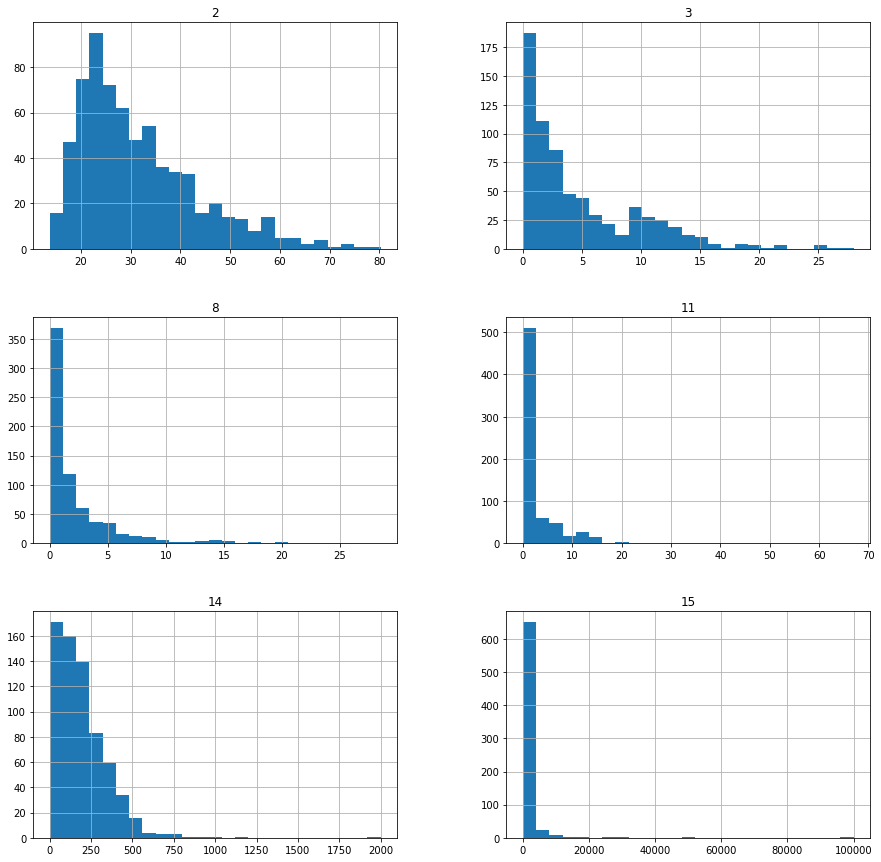

In [24]:
credit.hist(figsize=(15,15), bins= 25);

- Which variables are approximately normally distributed?

None, looks like the variables are all skewed. 

- Which variables show strong skew?

All variables exhibit strong skew.

- Make a scatterplot of each feature variable with the target variable (`16`).

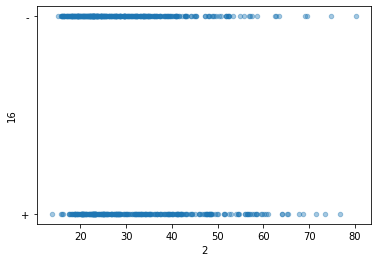

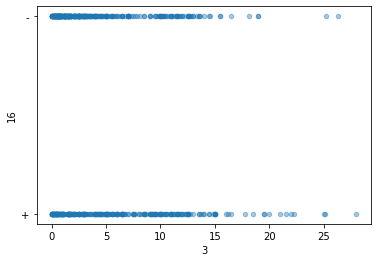

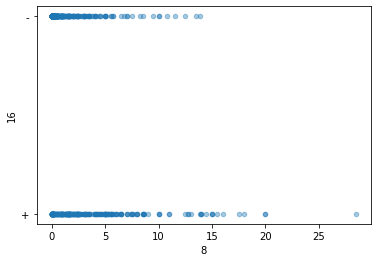

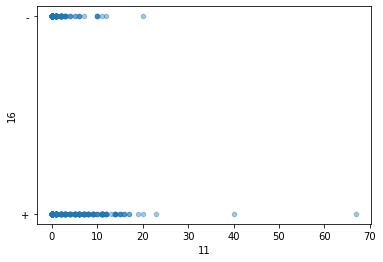

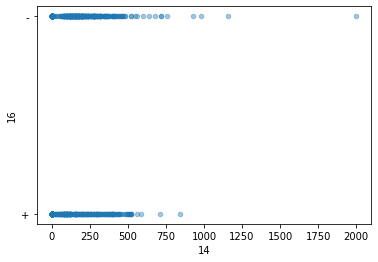

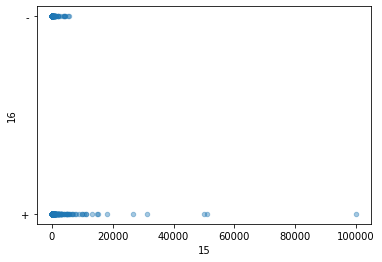

In [25]:
ax = credit.plot.scatter(x= 2, y= 16, alpha=0.4)
ax = credit.plot.scatter(x= 3, y= 16, alpha=0.4)
ax = credit.plot.scatter(x= 8, y= 16, alpha=0.4)
ax = credit.plot.scatter(x= 11, y= 16, alpha=0.4)
ax = credit.plot.scatter(x= 14, y= 16, alpha=0.4)
ax = credit.plot.scatter(x= 15, y= 16, alpha=0.4)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

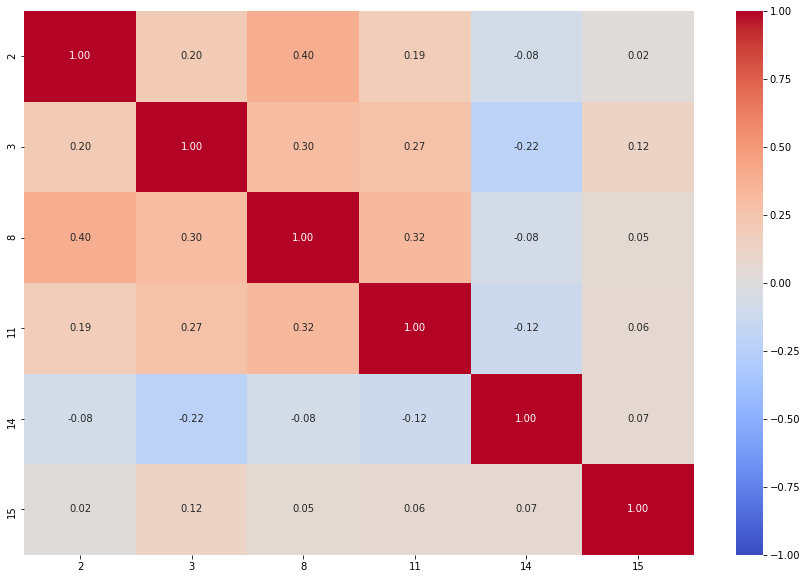

In [26]:
ax = plt.figure(figsize=(15,10))
sns.heatmap(
    credit.corr(),
    cmap='coolwarm',
    center=0,
    vmin= -1,
    vmax= 1,
    annot= True,
    fmt='.2f'
);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

The dataset is showing strong skews in variables. Perhaps a logistic regression model will perform better than a linear one. 

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [27]:
# Importing Dummy Classifier
from sklearn.dummy import DummyClassifier

credit = credit.dropna()
X = credit.drop(columns = 16)
y = credit[16]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [39]:
null = DummyClassifier()
null.fit(X_train, y_train)
print('Null model score:', null.score(X_test, y_test))

Null model score: 0.5612244897959183


### Logistic Regression

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [29]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [36]:
# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Defining X and y features
X = credit.select_dtypes('number')
y = credit[16]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, train_size= 0.70)

# Fitting the linear regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\bavph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
print('Test score:', lr.score(X_test, y_test))
print('Train score:', lr.score(X_train, y_train))

Test score: 0.7602040816326531
Train score: 0.7658643326039387


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

My model did better on train and test scores compared to the null, with 0.76 for test and 0.77 for train. This tells me that there is less bias in this model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The test score on my model was very close to the score on the training set (0.76 vs 0.77). This is an indication of low variance. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Probably a bias problem as the test score is very similar to the train score which indicates low variance. 

### Random Forest

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestClassifier` and then use `RandomForestClassifier` like any other scikit-learn estimator.

In [41]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print('Test score:' , rfc.score(X_test, y_test))
print('Train score:', rfc.score(X_train, y_train))

Test score: 0.7551020408163265
Train score: 1.0


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your logistic regression model.

Overall the test scores for the two models are extremely similar (0.755 for RFC and 0.76 for LR). However the RFC model has a perfect 1.0 train score, indicating no bias but higher variance (0.755 Test score vs. 1.0 Train score).

- Find a way to get a better score from either logistic regression or a random forest. Make notes about what you are trying and why.

I can further improve my random forest model by tuning the hyperparameters such as n_estimators, max_features and min_samples_leaf.

In [44]:
max_features_vals = [
    1.0,
    0.5,
    np.log2(len(X.columns)) / len(X.columns),
    np.sqrt(len(X.columns)) / len(X.columns),
]

max_features_vals

[1.0, 0.5, 0.430827083453526, 0.40824829046386296]

In [45]:
# Tuning hyperparameters in GridSearchCV

grid = GridSearchCV(
    estimator= RandomForestClassifier(n_jobs= -1, random_state= 42),
    param_grid={'n_estimators': range(10,600,50), 'max_features': max_features_vals, 'min_samples_leaf': [1, 2, 5, 10, 20, 50]},
    cv=KFold(5, shuffle=True, random_state= 1),
    return_train_score=True, 
    n_jobs= -1
)

grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [1.0, 0.5, 0.430827083453526,
                                          0.40824829046386296],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 50],
                         'n_estimators': range(10, 600, 50)},
             return_train_score=True)

In [47]:
grid.best_score_

0.7916970052847916

- **BONUS:** Keep going! Find ways to make your model better.